In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
df=pd.read_csv('bank_marketing_dataset.csv')
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct      79.0         1   -1.0         0  unknown  no  
1  cellular   11   may     220.0         1  339.0         4  failure  no  
2  cellular   16   apr     185.0         1  330.0         1  failure  no  
3   unknown    3   jun     199.0         4   -1.0         0  unknown  no  
4   unknown    5   may     226.0         1   -1.0         0  unknown  no

In [3]:
df.rename(columns = {"y":"Term Deposit","housing":"Housing Loan"},inplace = True) 

In [4]:
df.head()

age          job  marital  education default  balance Housing Loan loan  \
0   30   unemployed  married    primary      no     1787           no   no   
1   33     services  married  secondary      no     4789          yes  yes   
2   35   management   single   tertiary      no     1350          yes   no   
3   30   management  married   tertiary      no     1476          yes  yes   
4   59  blue-collar  married  secondary      no        0          yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular   19   oct      79.0         1   -1.0         0  unknown   
1  cellular   11   may     220.0         1  339.0         4  failure   
2  cellular   16   apr     185.0         1  330.0         1  failure   
3   unknown    3   jun     199.0         4   -1.0         0  unknown   
4   unknown    5   may     226.0         1   -1.0         0  unknown   

  Term Deposit  
0           no  
1           no  
2           no  
3           no  
4           no

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance',
       'Housing Loan', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Term Deposit'],
      dtype='object')

In [6]:
#Convert Month in string to Month integer
from time import strptime
df['month'] = df['month'].apply(lambda x: strptime(x,'%b').tm_mon) 

In [7]:
df['month'].head()

0    10
1     5
2     4
3     6
4     5
Name: month, dtype: int64

In [8]:
df.head()

age          job  marital  education default  balance Housing Loan loan  \
0   30   unemployed  married    primary      no     1787           no   no   
1   33     services  married  secondary      no     4789          yes  yes   
2   35   management   single   tertiary      no     1350          yes   no   
3   30   management  married   tertiary      no     1476          yes  yes   
4   59  blue-collar  married  secondary      no        0          yes   no   

    contact  day  month  duration  campaign  pdays  previous poutcome  \
0  cellular   19     10      79.0         1   -1.0         0  unknown   
1  cellular   11      5     220.0         1  339.0         4  failure   
2  cellular   16      4     185.0         1  330.0         1  failure   
3   unknown    3      6     199.0         4   -1.0         0  unknown   
4   unknown    5      5     226.0         1   -1.0         0  unknown   

  Term Deposit  
0           no  
1           no  
2           no  
3           no  
4           no

In [9]:
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
Housing Loan    0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Term Deposit    0
dtype: int64

#### Inference
No missing values in the dataset

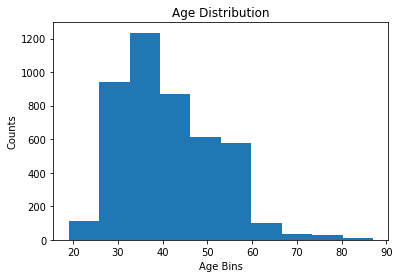

In [10]:
plt.hist(df.age,bins=10)
plt.xlabel('Age Bins')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.show()

#### Inference
There are over 1200 records from the 35-40 age

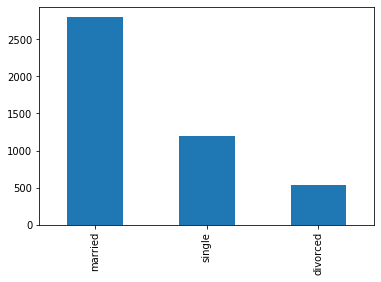

In [7]:
df['marital'].value_counts().plot(kind='bar')

In [8]:
pd.crosstab(df['marital'],df['y'])

y           no  yes
marital            
divorced   451   77
married   2520  277
single    1029  167

In [9]:
df_default=df.groupby(['housing','loan','y'])
df_default.count()['campaign']

housing  loan  y  
no       no    no     1394
               yes     283
         yes   no      267
               yes      18
yes      no    no     1958
               yes     195
         yes   no      381
               yes      25
Name: campaign, dtype: int64

#### Inference

1. people have no housing loan,no personal loan are not likely to opt for term deposit
2. people having housing loan and no personal loan *are likely* to opt for term deposit

In [11]:
df_yes=df[df['y']=='yes']
df_yes.head()

age         job   marital  education default  balance housing loan  \
13   20     student    single  secondary      no      502      no   no   
30   68     retired  divorced  secondary      no     4189      no   no   
33   32  management    single   tertiary      no     2536     yes   no   
34   49  technician   married   tertiary      no     1235      no   no   
36   78     retired  divorced    primary      no      229      no   no   

      contact  day month  duration  campaign  pdays  previous poutcome    y  
13   cellular   30   apr     261.0         1   -1.0         0  unknown  yes  
30  telephone   14   jul     897.0         2   -1.0         0  unknown  yes  
33   cellular   26   aug     958.0         6   -1.0         0  unknown  yes  
34   cellular   13   aug     354.0         3   -1.0         0  unknown  yes  
36  telephone   22   oct      97.0         1   -1.0         0  unknown  yes

In [12]:
df_yes.previous.value_counts()

0     337
1      51
2      50
4      25
3      22
5      13
6       9
9       3
8       3
7       3
14      2
10      2
12      1
Name: previous, dtype: int64

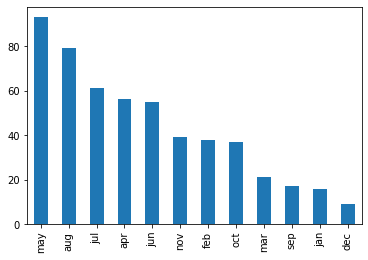

In [31]:
df_yes['month'].value_counts()
df_yes.month.value_counts().plot(kind='bar')


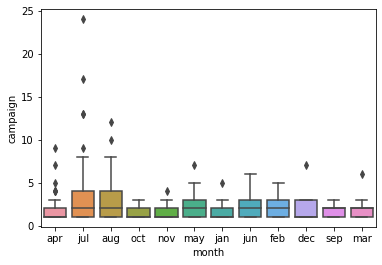

In [40]:
sns.boxplot(x='month',y='campaign',data=df_yes)

In [35]:
df_no=df[df['y']=='no']

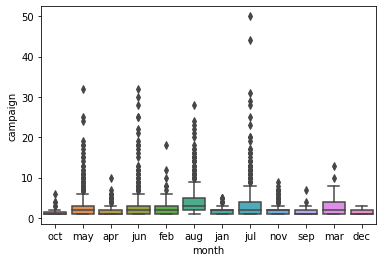

In [38]:
sns.boxplot(x='month',y='campaign',data=df_no)

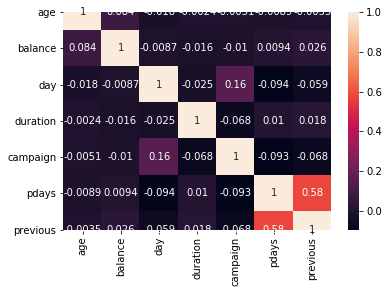

In [41]:
sns.heatmap(df.corr(),annot=True)

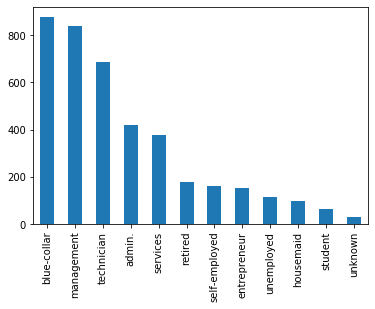

In [46]:
df_no.job.value_counts()
df_no.job.value_counts().plot(kind='bar')

As we can see
blue-collar job customers dont have term deposit 

df_yes.contact.value_counts()

In [47]:
df.duration.describe()

count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64

In [48]:
pd.crosstab(df.contact,df.y)

y            no  yes
contact             
cellular   2480  416
telephone   257   44
unknown    1263   61

In [49]:
pd.crosstab(df.duration,df.y)

y         no  yes
duration         
4.0        1    0
5.0        9    0
6.0        2    0
7.0        6    0
8.0        9    0
...       ..  ...
2029.0     0    1
2087.0     0    1
2456.0     0    1
2769.0     0    1
3025.0     1    0

[875 rows x 2 columns]

In [35]:
df=pd.get_dummies(df,drop_first=True) # Default it's false
df.head()

age  balance  day  month  duration  campaign  pdays  previous  \
0   30     1787   19     10      79.0         1   -1.0         0   
1   33     4789   11      5     220.0         1  339.0         4   
2   35     1350   16      4     185.0         1  330.0         1   
3   30     1476    3      6     199.0         4   -1.0         0   
4   59        0    5      5     226.0         1   -1.0         0   

   job_blue-collar  job_entrepreneur  ...  education_unknown  default_yes  \
0                0                 0  ...                  0            0   
1                0                 0  ...                  0            0   
2                0                 0  ...                  0            0   
3                0                 0  ...                  0            0   
4                1                 0  ...                  0            0   

   housing_yes  loan_yes  contact_telephone  contact_unknown  poutcome_other  \
0            0         0                  0                0               0   
1            1         1                  0                0               0   
2            1         0                  0                0               0   
3            1         1                  0                1               0   
4            1         0                  0                1               0   

   poutcome_success  poutcome_unknown  y_yes  
0                 0                 1      0  
1                 0                 0      0  
2                 0                 0      0  
3                 0                 1      0  
4                 0                 1      0  

[5 rows x 33 columns]

## Splitting DataSets

In [10]:
from sklearn import preprocessing
# create an object for label encoding
le = preprocessing.LabelEncoder()

In [11]:
df1 = df.apply(preprocessing.LabelEncoder().fit_transform)

In [12]:
df1.head()

age  job  marital  education  default  balance  Housing Loan  loan  \
0   11   10        1          0        0     1475             0     0   
1   14    7        1          1        0     2030             1     1   
2   16    4        2          2        0     1303             1     0   
3   11    4        1          2        0     1352             1     1   
4   40    1        1          1        0      274             1     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  \
0        0   18      9        75         0      0         0         3   
1        0   10      4       216         0    228         4         0   
2        0   15      3       181         0    219         1         0   
3        2    2      5       195         3      0         0         3   
4        2    4      4       222         0      0         0         3   

   Term Deposit  
0             0  
1             0  
2             0  
3             0  
4             0

In [19]:
df['Term Deposit'].value_counts()

no     4000
yes     521
Name: Term Deposit, dtype: int64

In [20]:
df1.head()

age  job  marital  education  default  balance  Housing Loan  loan  \
0   11   10        1          0        0     1475             0     0   
1   14    7        1          1        0     2030             1     1   
2   16    4        2          2        0     1303             1     0   
3   11    4        1          2        0     1352             1     1   
4   40    1        1          1        0      274             1     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  \
0        0   18     10        75         0      0         0         3   
1        0   10      8       216         0    228         4         0   
2        0   15      0       181         0    219         1         0   
3        2    2      6       195         3      0         0         3   
4        2    4      8       222         0      0         0         3   

   Term Deposit  
0             0  
1             0  
2             0  
3             0  
4             0

In [13]:
df1.corr()

age       job   marital  education   default   balance  \
age           1.000000 -0.021550 -0.381625  -0.121479 -0.017874  0.094004   
job          -0.021550  1.000000  0.069390   0.170160  0.008324  0.011713   
marital      -0.381625  0.069390  1.000000   0.102714 -0.020745  0.028762   
education    -0.121479  0.170160  0.102714   1.000000 -0.010534  0.073274   
default      -0.017874  0.008324 -0.020745  -0.010534  1.000000 -0.133943   
balance       0.094004  0.011713  0.028762   0.073274 -0.133943  1.000000   
Housing Loan -0.193820 -0.128353 -0.029851  -0.087070  0.006881 -0.040282   
loan         -0.011178 -0.040245 -0.045210  -0.054086  0.063994 -0.100990   
contact       0.015170 -0.074068 -0.068236  -0.110554  0.008448 -0.014472   
day          -0.017985  0.012865  0.008794   0.014926 -0.013261 -0.004523   
month         0.073886  0.043228 -0.051565   0.061689  0.008917  0.093146   
duration     -0.006788 -0.007960  0.005323  -0.013823 -0.013535  0.031835   
campaign     -0.004821 -0.000976  0.006992  -0.000026 -0.012358 -0.026270   
pdays        -0.016944 -0.030435  0.016191   0.000035 -0.023564  0.017278   
previous     -0.003243  0.005738  0.039163   0.024945 -0.026967  0.047439   
poutcome     -0.009242  0.013049 -0.027716  -0.032135  0.039032 -0.048173   
Term Deposit  0.044866  0.027401  0.015042   0.042987  0.001303  0.074867   

              Housing Loan      loan   contact       day     month  duration  \
age              -0.193820 -0.011178  0.015170 -0.017985  0.073886 -0.006788   
job              -0.128353 -0.040245 -0.074068  0.012865  0.043228 -0.007960   
marital          -0.029851 -0.045210 -0.068236  0.008794 -0.051565  0.005323   
education        -0.087070 -0.054086 -0.110554  0.014926  0.061689 -0.013823   
default           0.006881  0.063994  0.008448 -0.013261  0.008917 -0.013535   
balance          -0.040282 -0.100990 -0.014472 -0.004523  0.093146  0.031835   
Housing Loan      1.000000  0.018451  0.196454 -0.031291 -0.170922  0.017126   
loan              0.018451  1.000000 -0.007319 -0.004879  0.039226 -0.005424   
contact           0.196454 -0.007319  1.000000 -0.033807 -0.188191 -0.022171   
day              -0.031291 -0.004879 -0.033807  1.000000  0.080436 -0.031781   
month            -0.170922  0.039226 -0.188191  0.080436  1.000000 -0.001936   
duration          0.017126 -0.005424 -0.022171 -0.031781 -0.001936  1.000000   
campaign         -0.006447  0.015134  0.013776  0.162100  0.060472 -0.092409   
pdays             0.130034 -0.030300 -0.240919 -0.096096 -0.129750  0.013331   
previous          0.038780 -0.022237 -0.189725 -0.060057 -0.037916  0.023963   
poutcome         -0.093093  0.027028  0.267173  0.073714  0.084426 -0.004120   
Term Deposit     -0.104683 -0.070517 -0.133595 -0.011244  0.023335  0.406754   

              campaign     pdays  previous  poutcome  Term Deposit  
age          -0.004821 -0.016944 -0.003243 -0.009242      0.044866  
job          -0.000976 -0.030435  0.005738  0.013049      0.027401  
marital       0.006992  0.016191  0.039163 -0.027716      0.015042  
education    -0.000026  0.000035  0.024945 -0.032135      0.042987  
default      -0.012358 -0.023564 -0.026967  0.039032      0.001303  
balance      -0.026270  0.017278  0.047439 -0.048173      0.074867  
Housing Loan -0.006447  0.130034  0.038780 -0.093093     -0.104683  
loan          0.015134 -0.030300 -0.022237  0.027028     -0.070517  
contact       0.013776 -0.240919 -0.189725  0.267173     -0.133595  
day           0.162100 -0.096096 -0.060057  0.073714     -0.011244  
month         0.060472 -0.129750 -0.037916  0.084426      0.023335  
duration     -0.092409  0.013331  0.023963 -0.004120      0.406754  
campaign      1.000000 -0.089607 -0.070780  0.113321     -0.062193  
pdays        -0.089607  1.000000  0.566092 -0.844314      0.086057  
previous     -0.070780  0.566092  1.000000 -0.644922      0.119566  
poutcome      0.113321 -0.844314 -0.644922  1.000000     -0.082632  
Term Deposit -0.06

In [14]:
from scipy.stats import ttest_ind


In [15]:
for i in df1.columns:
    print("P score of ",i," and Term Deposit is ",ttest_ind(df1[i],df1["Term Deposit"])[1])


P score of  age  and Term Deposit is  0.0
P score of  job  and Term Deposit is  0.0
P score of  marital  and Term Deposit is  0.0
P score of  education  and Term Deposit is  0.0
P score of  default  and Term Deposit is  9.289350308118322e-81
P score of  balance  and Term Deposit is  0.0
P score of  Housing Loan  and Term Deposit is  0.0
P score of  loan  and Term Deposit is  1.5149448776678993e-07
P score of  contact  and Term Deposit is  8.066026419836731e-290
P score of  day  and Term Deposit is  0.0
P score of  month  and Term Deposit is  0.0
P score of  duration  and Term Deposit is  0.0
P score of  campaign  and Term Deposit is  4.289024437527344e-282
P score of  pdays  and Term Deposit is  3.307647658297875e-150
P score of  previous  and Term Deposit is  5.730418123725726e-63
P score of  poutcome  and Term Deposit is  0.0
P score of  Term Deposit  and Term Deposit is  1.0


In [16]:
import statsmodels.api as sm

In [17]:
df.shape

(4521, 17)

In [18]:
df['Term Deposit'].value_counts()

no     4000
yes     521
Name: Term Deposit, dtype: int64

In [19]:
y=df1["Term Deposit"]
X=df1.drop('Term Deposit',axis=1)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

## 1. Logistic Regression  

In [21]:
y=df1["Term Deposit"]
X=df1.drop('Term Deposit',axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print('train score: ', classifier.score(X_train,y_train))
print('test score: ',classifier.score(X_test,y_test))

train score:  0.893173198482933
test score:  0.8754605747973471


#### Model Evaluation

In [34]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1149,   41],
       [ 128,   39]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.8754605747973471

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1190
           1       0.49      0.23      0.32       167

    accuracy                           0.88      1357
   macro avg       0.69      0.60      0.62      1357
weighted avg       0.85      0.88      0.86      1357



## 2. Decision Tree

In [40]:
y=df1['Term Deposit']
X=df1.drop(['Term Deposit'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [42]:
# fitting decision tree classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifer.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [43]:
y_pred = classifer.predict(X_test)

In [44]:
#making confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1093,   97],
       [  89,   78]], dtype=int64)

In [45]:
print('Accuracy score',metrics.accuracy_score(y_test,y_pred))
print('Precision score',metrics.precision_score(y_test,y_pred))

Accuracy score 0.8629329403095063
Precision score 0.44571428571428573


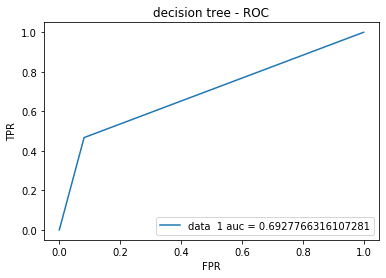

In [30]:
y_pred_proba = classifer.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "data  1 auc = "+str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('decision tree - ROC')
plt.legend(loc = 4)
plt.show()

In [31]:
from sklearn.metrics import roc_curve


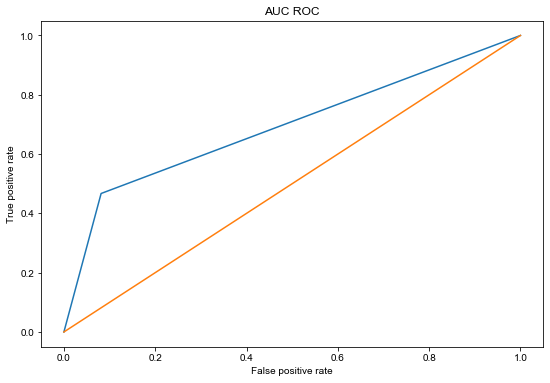

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate=True)
f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [35]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [36]:
print("Accuracy score",metrics.accuracy_score(y_test,y_pred))
print("precision", metrics.precision_score(y_test,y_pred))

Accuracy score 0.8629329403095063
precision 0.44571428571428573


In [37]:
feature_cols=['age','job','martial','default','housing','loan','campaign']

In [38]:
dot_data = StringIO()
export_graphviz(classifer, out_file= dot_data,
                   filled= True,rounded= True,
               special_characters= True,feature_names=df1.drop('y',axis=1).columns,
               class_names= ['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_marketing.png')
Image(graph.create_png())

In [39]:
classifer = DecisionTreeClassifier(class_weight= None,criterion= 'entropy', max_depth= 5, max_features= None, max_leaf_nodes= 5,
                                   min_samples_leaf= 3, min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                                   presort=False, random_state= None, splitter= 'best')
classifer.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:

classsifer= classifer.fit(X_train,y_train)

In [41]:
y_pred = classifer.predict(X_test)

In [51]:
print('train score: ', classifier.score(X_train,y_train))
print('test score: ',classifier.score(X_test,y_test))

train score:  0.893173198482933
test score:  0.8754605747973471


In [42]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1190,    0],
       [ 167,    0]], dtype=int64)

In [43]:
from sklearn.metrics import recall_score

In [44]:
print("Accuracy score",metrics.accuracy_score(y_test,y_pred))

Accuracy score 0.8769344141488578


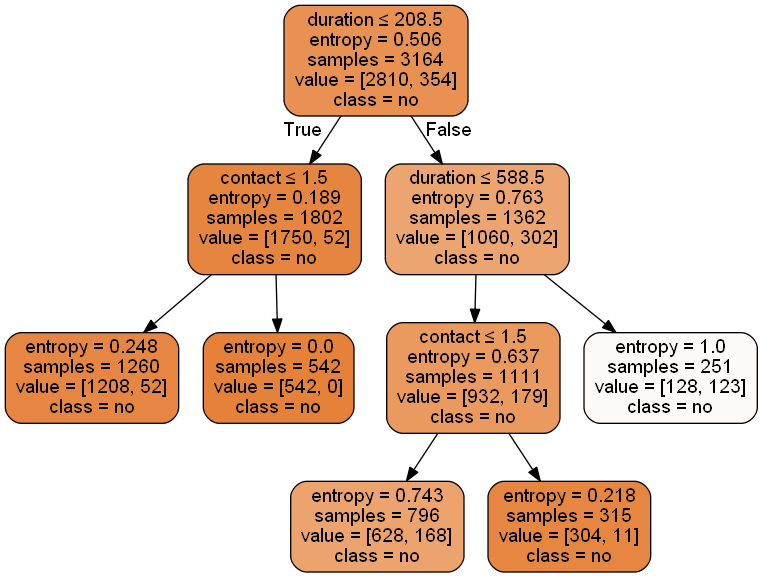

In [45]:
dot_data = StringIO()
export_graphviz(classifer, out_file= dot_data,
                   filled= True,rounded= True,
               special_characters= True,feature_names= df1.drop('y',axis=1).columns,
               class_names= ['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### 3. Random Forest Classification

In [52]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [53]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#predict the model
y_pred=clf.predict(X_test)

In [54]:
###Model Evaluation

In [55]:
print('train score: ', classifier.score(X_train,y_train))
print('test score: ',classifier.score(X_test,y_test))

train score:  0.893173198482933
test score:  0.8754605747973471


In [56]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1154,   36],
       [ 114,   53]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred)

0.8894620486366986

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.60      0.32      0.41       167

    accuracy                           0.89      1357
   macro avg       0.75      0.64      0.68      1357
weighted avg       0.87      0.89      0.87      1357



### 4. Build KNN Model

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
y_pred=classifier.predict(X_test)

In [61]:
print('train score: ', classifier.score(X_train,y_train))
print('test score: ',classifier.score(X_test,y_test))

train score:  0.9083438685208597
test score:  0.871039056742815


In [62]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1147,   43],
       [ 132,   35]], dtype=int64)

In [64]:
print ('Accuracy Score :',accuracy_score(y_test, y_pred), )

Accuracy Score : 0.871039056742815


In [65]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
k_range=range(1,31)
#list of scores from k_range

k_scores=[]
# 1. we will loop throught reasonable values of k
for k in k_range:
    #2. KNeighborsClassifier with k neighbour
    knn=KNeighborsClassifier(n_neighbors=k)
    #3. obtain cross_val_score from KNeighborsClassifier with k neighbours
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    #4. append the mean of scores for k neighbors to k-scores list
    k_scores.append(scores.mean())
    
print(k_scores)

[0.8553439215456444, 0.8794531051593116, 0.8703827970853114, 0.8803365957529937, 0.8750273496258962, 0.8798955830354178, 0.875913282150462, 0.8810008009533299, 0.8796714137803043, 0.8816635409951357, 0.8812205747328529, 0.8829904862372775, 0.8814418136709058, 0.8832117251753306, 0.8829904862372775, 0.8847589325831722, 0.8838730000586065, 0.8854216726249782, 0.8847579558108187, 0.8843169430932427, 0.8838739768309598, 0.8829899978511009, 0.8849816366797555, 0.8863080935357207, 0.8871920725155796, 0.8858656156596144, 0.8860873429838444, 0.8858665924319679, 0.8865288440875968, 0.8858656156596144]


Text(0, 0.5, 'Cross-Validated Accuracy')

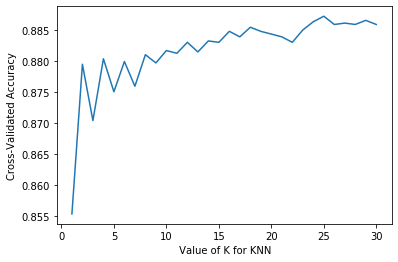

In [67]:
# plot the values of K for KNN(x-axis ) versus the cross_validated accuracy(y-axis)
plt.plot(k_range,k_scores)
plt.xlabel(' Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### KNN n_neighbours=25

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [68]:
y_pred=classifier.predict(X_test)

In [69]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1147,   43],
       [ 132,   35]], dtype=int64)

In [70]:
print('train score: ', classifier.score(X_train,y_train))
print('test score: ',classifier.score(X_test,y_test))

train score:  0.9083438685208597
test score:  0.871039056742815


In [71]:
print ('Accuracy Score :',accuracy_score(y_test, y_pred), )

Accuracy Score : 0.871039056742815


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1190
           1       0.45      0.21      0.29       167

    accuracy                           0.87      1357
   macro avg       0.67      0.59      0.61      1357
weighted avg       0.84      0.87      0.85      1357



## Grid Search CV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
k_range=list(range(1,31))
weight_options=['uniform','distance']

In [75]:
param_grid=dict(n_neighbors=k_range,weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [76]:
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [77]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.887193098871931
{'n_neighbors': 25, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')


### Changing to Best Parameters

In [78]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1147,   43],
       [ 132,   35]], dtype=int64)

In [76]:
accuracy_score(y_test,y_pred)

0.8835666912306559

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.62      0.14      0.23       167

    accuracy                           0.88      1357
   macro avg       0.76      0.56      0.58      1357
weighted avg       0.86      0.88      0.85      1357



### 5. Naive Bayes

In [78]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [79]:
#Create a Gaussian Classifier
model = GaussianNB()

In [80]:
# Train the model using the training sets
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
#Predict Output
y_pred= model.predict(X_test)
print ("Predicted Value:", y_pred)

Predicted Value: [0 0 1 ... 0 0 0]


In [83]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1054,  136],
       [  91,   76]], dtype=int64)

In [84]:
accuracy_score(y_test,y_pred)

0.8327192336035372

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1190
           1       0.36      0.46      0.40       167

    accuracy                           0.83      1357
   macro avg       0.64      0.67      0.65      1357
weighted avg       0.85      0.83      0.84      1357



## 6. Bagging to Split the Data

#### 1. Ada Boost Classifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
y=df1['y']
X=df1.drop(['y'],axis=1)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [92]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [94]:
y_pred = classifier.predict(X_test)

### Model Evaluation

In [95]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1138,   52],
       [ 109,   58]], dtype=int64)

In [96]:
accuracy_score(y_test,y_pred)

0.8813559322033898

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1190
           1       0.53      0.35      0.42       167

    accuracy                           0.88      1357
   macro avg       0.72      0.65      0.68      1357
weighted avg       0.87      0.88      0.87      1357



###  2. Gradient Descend

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.888
Accuracy score (validation): 0.877
Learning rate:  0.075
Accuracy score (training): 0.889
Accuracy score (validation): 0.877
Learning rate:  0.1
Accuracy score (training): 0.889
Accuracy score (validation): 0.877
Learning rate:  0.25
Accuracy score (training): 0.897
Accuracy score (validation): 0.878
Learning rate:  0.5
Accuracy score (training): 0.907
Accuracy score (validation): 0.884
Learning rate:  0.75
Accuracy score (training): 0.909
Accuracy score (validation): 0.885
Learning rate:  1
Accuracy score (training): 0.912
Accuracy score (validation): 0.882


Changing to 0.75 learning rate

In [102]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print();print("Accuracy:",metrics.accuracy_score(y_test, predictions))

print();print("Classification Report")
print();print(classification_report(y_test, predictions))

Confusion Matrix:
[[1150   40]
 [ 116   51]]

Accuracy: 0.8850405305821666

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.56      0.31      0.40       167

    accuracy                           0.89      1357
   macro avg       0.73      0.64      0.67      1357
weighted avg       0.87      0.89      0.87      1357



### 3. XG Boost

In [104]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[1151,  115],
       [  39,   52]], dtype=int64)

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8865143699336773


### Stacking

In [111]:
from mlxtend.classifier import StackingClassifier
from vecstack import stacking

In [112]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),

    RandomForestClassifier(random_state=0, n_jobs=-1,
                           n_estimators=100, max_depth=3),

    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [113]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.86994949]
    fold  1:  [0.87247475]
    fold  2:  [0.87088608]
    fold  3:  [0.87974684]
    ----
    MEAN:     [0.87326429] + [0.00385002]
    FULL:     [0.87326169]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88762626]
    fold  1:  [0.88762626]
    fold  2:  [0.88860759]
    fold  3:  [0.88860759]
    ----
    MEAN:     [0.88811693] + [0.00049067]
    FULL:     [0.88811631]

model  2:     [XGBClassifier]
    fold  0:  [0.89015152]
    fold  1:  [0.90151515]
    fold  2:  [0.89240506]
    fold  3:  [0.88734177]
    ----
    MEAN:     [0.89285338] + [0.00531284]
    FULL:     [0.89285714]



# Conclusion

1. People having house loan and personal loan are more likely to get term deposit
2. Used all models
        1. Logestic Regression Accuracy:87.54%
        2. Decision Tree Accuracy: 86% after tuning and prunning 87% 
        3. KNN Accuracy:87.1% after the best n_neighbour=25 88.3%
        4. Bayes Accuracy:83.2%
3. So KNN accuracy has highest accuracy of 88.3%